## Project Overview: Predicting TED Talk Popularity Using NLP

**Course**: INFO-6148 Natural Language Processing  
**Professor**: Gholamiangonabadi, Davoud  
**Author**: Dineth Hettiarachchi

### Objective
Use Natural Language Processing (NLP) to predict the popularity of TED Talks by classifying them into "High Views" or "Low Views" categories. This project involves text preprocessing using SpaCy and applying various machine learning models to predict whether a TED Talk will receive high or low viewership based on its transcript and metadata. The final outcome we are aiming for is a model that accurately predicts talk popularity, enhances content discoverability, and provides insights into which NLP techniques are most effective for this type of classification.

### Why It's Interesting
- **Connects Ideas with Technology**: Predicting the popularity of TED Talks through NLP showcases how technology can help understand audience preferences and trends.
- **Improves Discoverability**: Helps users identify potentially popular talks that align with their interests, enhancing personalization.
- **Showcases NLP Techniques**: Demonstrates the use of tokenization, lemmatization, and classification in solving real-world problems related to content popularity.

### Impact
Helps simplify the discovery of TED Talks by categorizing content based on predicted popularity, making it easier for audiences to find engaging and relevant topics.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL
import random
import ast
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import random

In [3]:
import kagglehub
datasetPath = kagglehub.dataset_download('rounakbanik/ted-talks')

100%|██████████| 12.0M/12.0M [00:00<00:00, 47.2MB/s]

Extracting files...


In [4]:
print(datasetPath)

/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3


In [5]:
data_path = '/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3/ted_main.csv'
transcripts_path = '/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3/transcripts.csv'

In [6]:
ted = pd.read_csv(data_path)
transcripts = pd.read_csv(transcripts_path)

In [7]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [8]:
print("TED Dataset Info:")
print(ted.info())

TED Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views 

In [9]:
# Check for missing values
print("Missing Values:")
print(ted.isnull().sum())

Missing Values:
comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64


In [10]:
ted['speaker_occupation'] = ted['speaker_occupation'].fillna('Unknown')

In [11]:
print("Updated Missing Values:")
print(ted.isnull().sum())

Updated Missing Values:
comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64


In [12]:
print("Summary Statistics:")
print(ted.describe())

Summary Statistics:
          comments     duration     film_date    languages  num_speaker  \
count  2550.000000  2550.000000  2.550000e+03  2550.000000  2550.000000   
mean    191.562353   826.510196  1.321928e+09    27.326275     1.028235   
std     282.315223   374.009138  1.197391e+08     9.563452     0.207705   
min       2.000000   135.000000  7.464960e+07     0.000000     1.000000   
25%      63.000000   577.000000  1.257466e+09    23.000000     1.000000   
50%     118.000000   848.000000  1.333238e+09    28.000000     1.000000   
75%     221.750000  1046.750000  1.412964e+09    33.000000     1.000000   
max    6404.000000  5256.000000  1.503792e+09    72.000000     5.000000   

       published_date         views  
count    2.550000e+03  2.550000e+03  
mean     1.343525e+09  1.698297e+06  
std      9.464009e+07  2.498479e+06  
min      1.151367e+09  5.044300e+04  
25%      1.268463e+09  7.557928e+05  
50%      1.340935e+09  1.124524e+06  
75%      1.423432e+09  1.700760e+06  


In [13]:
print("Transcripts Dataset Info:")
print(transcripts.info())

Transcripts Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2467 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB
None


In [14]:
# Check for missing values
print("Missing Values:")
print(transcripts.isnull().sum())

Missing Values:
transcript    0
url           0
dtype: int64


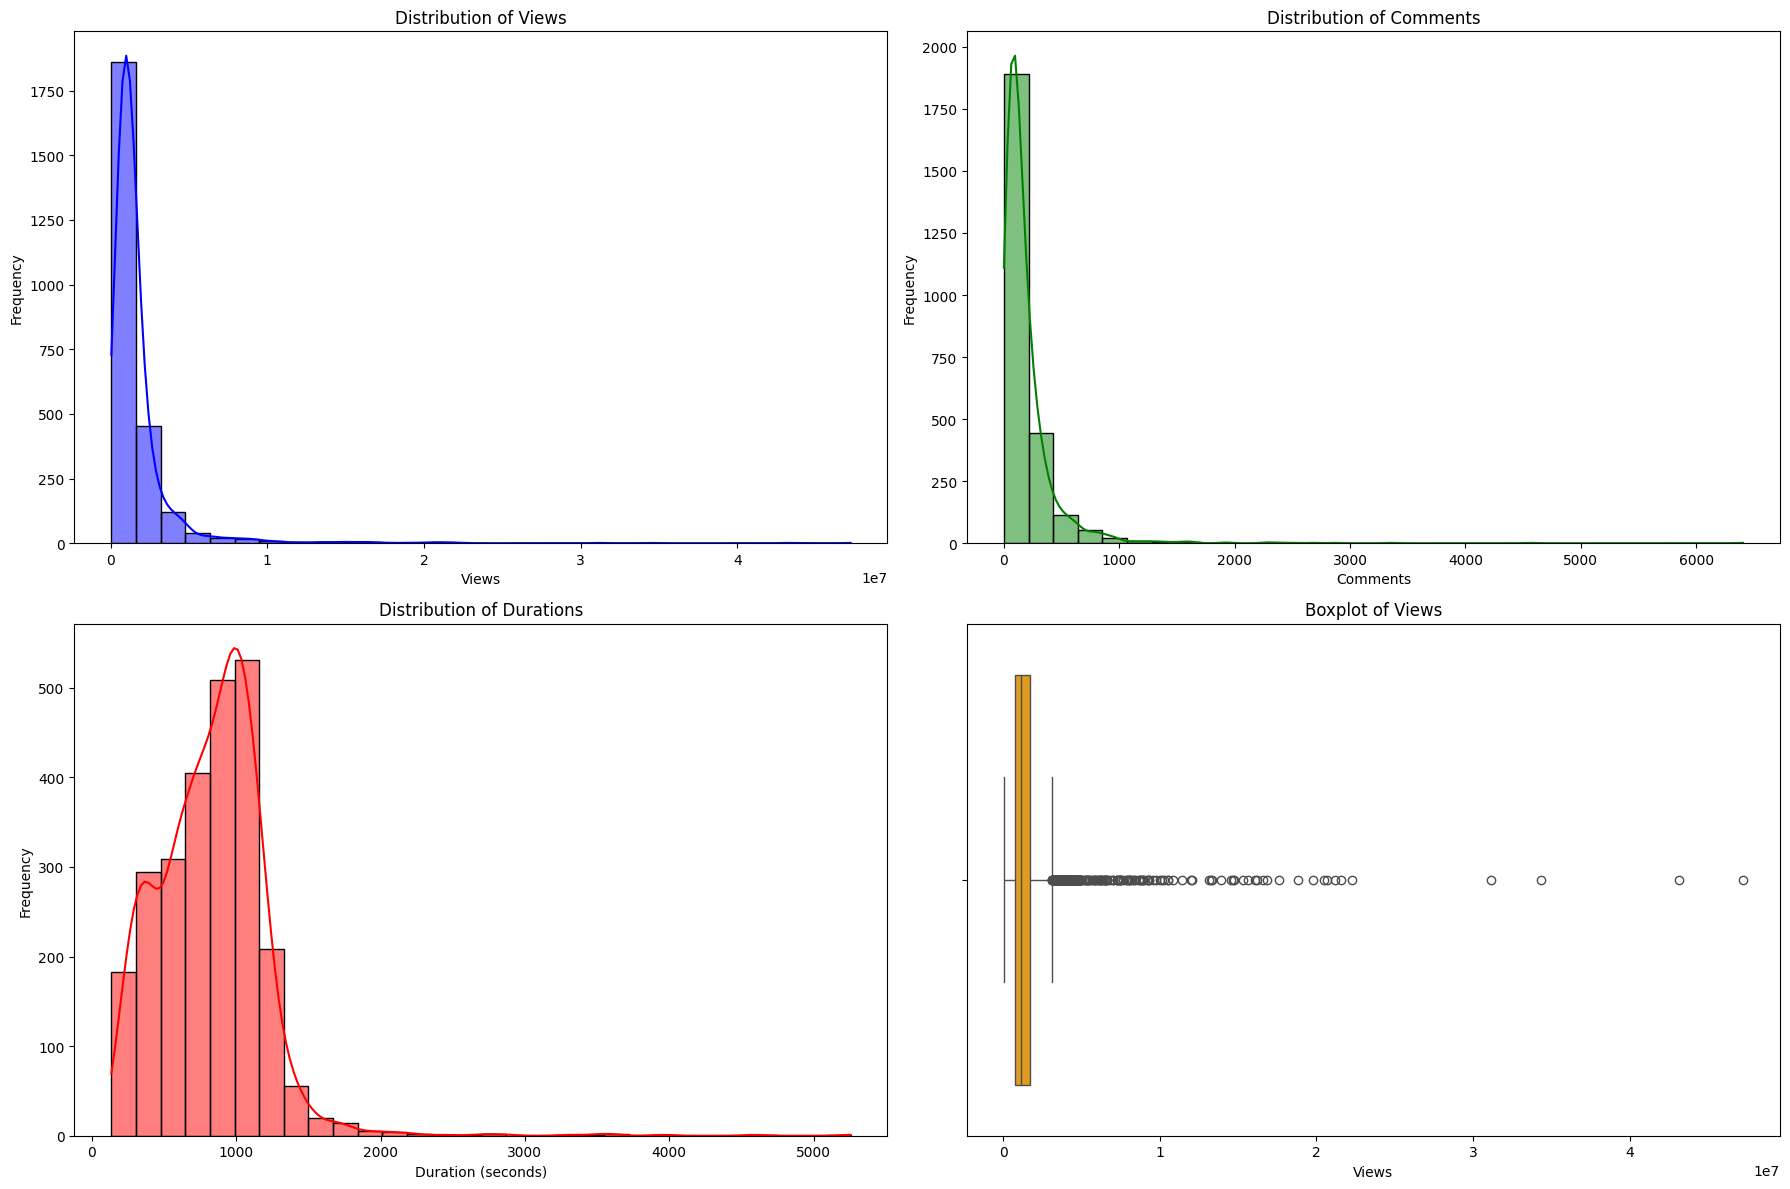

In [15]:
# Visualizations
plt.figure(figsize=(18, 12))

# Histogram for views
plt.subplot(2, 2, 1)
sns.histplot(ted['views'], bins=30, kde=True, color='blue')
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')

# Histogram for comments
plt.subplot(2, 2, 2)
sns.histplot(ted['comments'], bins=30, kde=True, color='green')
plt.title('Distribution of Comments')
plt.xlabel('Comments')
plt.ylabel('Frequency')

# Histogram for durations
plt.subplot(2, 2, 3)
sns.histplot(ted['duration'], bins=30, kde=True, color='red')
plt.title('Distribution of Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Boxplot for views to detect outliers
plt.subplot(2, 2, 4)
sns.boxplot(x=ted['views'], color='orange')
plt.title('Boxplot of Views')
plt.xlabel('Views')

plt.tight_layout()
plt.show()

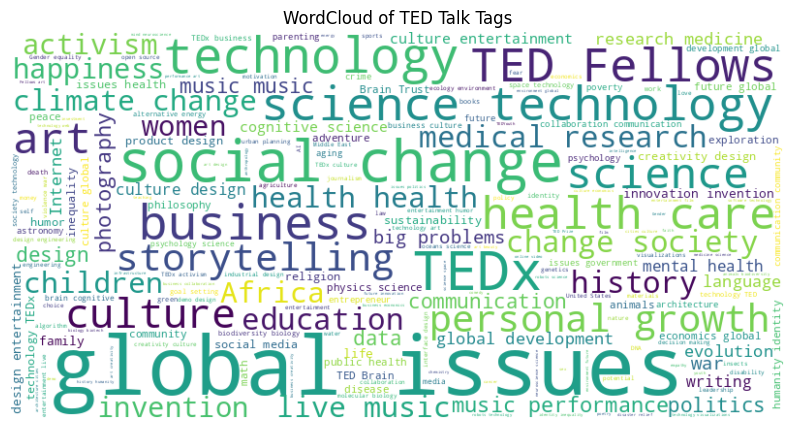

In [16]:
if 'tags' in ted.columns:
    ted['parsed_tags'] = ted['tags'].apply(ast.literal_eval)
    ted['parsed_tags'] = ted['parsed_tags'].apply(lambda x: ', '.join(x))
    all_tags = ' '.join(ted['parsed_tags'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud of TED Talk Tags')
    plt.show()

In [17]:
# Aggregate themes (tags)
theme_counts = ted['parsed_tags'].str.split(', ').explode().value_counts().head(10)

In [18]:
# Bar plot for themes
fig = px.bar(
    theme_counts,
    x=theme_counts.index,
    y=theme_counts.values,
    labels={'index': 'Theme', 'y': 'Count'},
    title='Top 10 Themes in TED Talks',
    color_discrete_sequence=['#636EFA']
    )
fig.update_layout(
    xaxis_title='Theme',
    yaxis_title='Count',
    template='plotly_white'
    )

fig.show()

In [19]:
plt.figure(figsize=(18, 12))

# Scatter plot: Views vs. Comments
fig = px.scatter(
    ted, x='views', y='comments',
    title='Views vs. Comments',
    labels={'views': 'Number of Views', 'comments': 'Number of Comments'},
    opacity=0.6,
    color_discrete_sequence=['#EF553B']
)
fig.show()

<Figure size 1800x1200 with 0 Axes>

In [20]:
# Scatter plot: Views vs. Duration
fig = px.scatter(
    ted, x='views', y='duration',
    title='Views vs. Duration',
    labels={'views': 'Number of Views', 'duration': 'Duration (seconds)'},
    opacity=0.6,
    color_discrete_sequence=['#00CC96']
)
fig.show()

In [21]:
# Scatter plot: Comments vs. Duration
fig = px.scatter(
    ted, x='comments', y='duration',
    title='Comments vs. Duration',
    labels={'comments': 'Number of Comments', 'duration': 'Duration (seconds)'},
    opacity=0.6,
    color_discrete_sequence=['#AB63FA']
)
fig.show()

In [22]:
# Line plot: TED talks over the years
ted['film_year'] = pd.to_datetime(ted['film_date'], unit='s').dt.year
film_counts = ted['film_year'].value_counts().sort_index()
fig = px.line(
    film_counts,
    x=film_counts.index,
    y=film_counts.values,
    labels={'x': 'Year', 'y': 'Number of Talks'},
    title='Number of TED Talks Over the Years'
)
fig.update_layout(template='plotly_white')
fig.show()


In [23]:
# Data Preprocessing with SpaCy
nlp = spacy.load('en_core_web_sm')

In [24]:
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

In [25]:
# Reduce dataset size for quicker processing
sampled_transcripts = transcripts.sample(frac=0.3, random_state=42)
# Apply preprocessing to the transcripts using tqdm for progress tracking
tqdm.pandas(desc="Processing Transcripts")
sampled_transcripts['processed_transcript'] = sampled_transcripts['transcript'].progress_apply(preprocess_text)

# Display the first few processed transcripts
print(sampled_transcripts[['transcript', 'processed_transcript']].head())

Processing Transcripts: 100%|██████████| 740/740 [05:08<00:00,  2.40it/s]

                                             transcript  \
1711  I would like to share with you a new model of ...   
1557  Mobility in developing world cities is a very ...   
1870  I dedicated the past two years to understandin...   
1703  When I was preparing for this talk, I went to ...   
1857  We are built out of very small stuff, and we a...   

                                   processed_transcript  
1711  like share new model high education model expa...  
1557  mobility develop world city peculiar challenge...  
1870  dedicate past year understand people achieve d...  
1703  prepare talk go search couple quote share good...  
1857  build small stuff embed large cosmo fact good ...  


In [26]:
# Model Selection and Preparation
# Using Naive Bayes, SVM, Random Forest for classification; KMeans and DBSCAN for clustering

# Splitting the data
X = sampled_transcripts['processed_transcript']
y = ted.loc[sampled_transcripts.index, 'views']

# Convert views into binary classification labels (e.g., high vs low views)
median_views = y.median()
y = y.apply(lambda x: 1 if x > median_views else 0)

# TF-IDF Vectorization with n-grams
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X)

# Topic Modeling with LDA
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(X_tfidf)

meta_features = ted.loc[sampled_transcripts.index, ['duration', 'languages', 'num_speaker']]
X_meta = pd.concat([pd.DataFrame(lda_topics), meta_features.reset_index(drop=True)], axis=1)

# Oversampling to balance classes
smote = SMOTE(random_state=42)
X_meta.columns = X_meta.columns.astype(str)
X_resampled, y_resampled = smote.fit_resample(X_meta, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Logistic Regression with L2 Penalty Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        71
           1       0.60      0.70      0.65        77

    accuracy                           0.60       148
   macro avg       0.60      0.60      0.59       148
weighted avg       0.60      0.60      0.60       148



<Figure size 800x600 with 0 Axes>

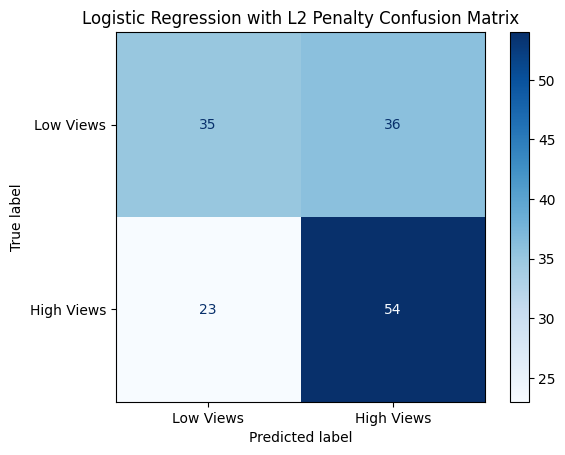

Accuracy: 0.6013513513513513


In [27]:
# Model 1a: Logistic Regression with L2 penalty
lr_params_l2 = {'C': [0.01, 0.1, 1.0, 10, 100], 'penalty': ['l2'], 'solver': ['saga']} #lbfgs, liblinear
lr_l2 = GridSearchCV(LogisticRegression(max_iter=15000), lr_params_l2, cv=3)
lr_l2.fit(X_train, y_train)
y_pred_lr_l2 = lr_l2.predict(X_test)
print("Logistic Regression with L2 Penalty Report:")
print(classification_report(y_test, y_pred_lr_l2))

# Visualize Confusion Matrix for Logistic Regression with L2
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr_l2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Views', 'High Views'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression with L2 Penalty Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_lr_l2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

Logistic Regression with L1 Penalty Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        71
           1       0.60      0.70      0.65        77

    accuracy                           0.60       148
   macro avg       0.60      0.60      0.59       148
weighted avg       0.60      0.60      0.60       148



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



<Figure size 800x600 with 0 Axes>

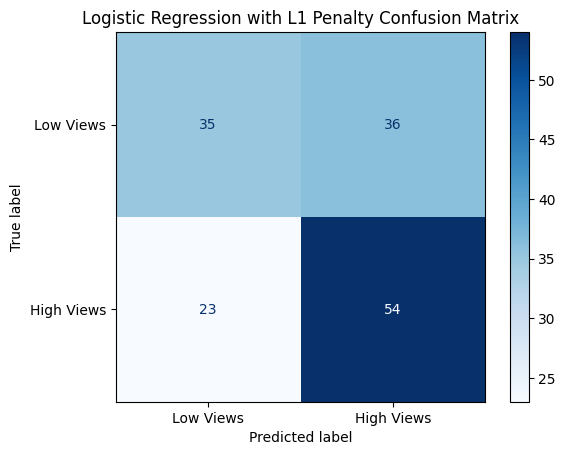

Accuracy: 0.6013513513513513


In [32]:
# Model 1b: Logistic Regression with L1 penalty
lr_params_l1 = {'C': [0.01, 0.1, 1.0, 10, 100], 'penalty': ['l1'], 'solver': ['saga']}
lr_l1 = GridSearchCV(LogisticRegression(max_iter=5000), lr_params_l1, cv=3)
lr_l1.fit(X_train, y_train)
y_pred_lr_l1 = lr_l1.predict(X_test)
print("Logistic Regression with L1 Penalty Report:")
print(classification_report(y_test, y_pred_lr_l1))

# Visualize Confusion Matrix for Logistic Regression with L1
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr_l1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Views', 'High Views'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression with L1 Penalty Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_lr_l1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

Logistic Regression with ElasticNet Penalty Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        71
           1       0.60      0.70      0.65        77

    accuracy                           0.60       148
   macro avg       0.60      0.60      0.59       148
weighted avg       0.60      0.60      0.60       148



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



<Figure size 800x600 with 0 Axes>

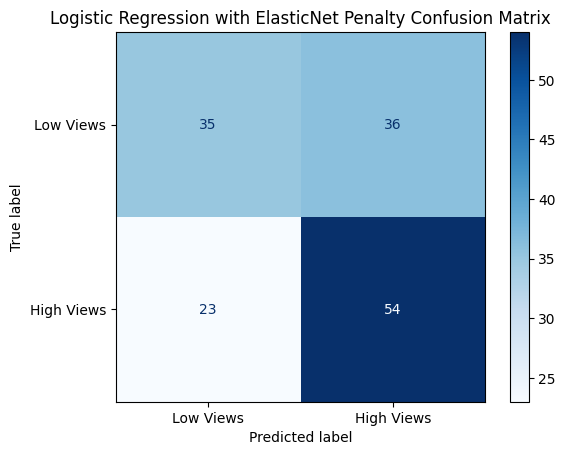

Accuracy: 0.6013513513513513


In [33]:
# Model 1c: Logistic Regression with ElasticNet penalty
lr_params_en = {'C': [0.01, 0.1, 1.0, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5]}
lr_en = GridSearchCV(LogisticRegression(max_iter=5000), lr_params_en, cv=3)
lr_en.fit(X_train, y_train)
y_pred_lr_en = lr_en.predict(X_test)
print("Logistic Regression with ElasticNet Penalty Report:")
print(classification_report(y_test, y_pred_lr_en))

# Visualize Confusion Matrix for Logistic Regression with ElasticNet
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr_en)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Views', 'High Views'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression with ElasticNet Penalty Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_lr_en))

In [34]:
!pip install spacy-lookups-data

In [35]:
# SpaCy Model

# Load a blank SpaCy model
nlp = spacy.blank("en")

# Remove the existing textcat if already present
if "textcat" in nlp.pipe_names:
    nlp.remove_pipe("textcat")

# Set up SpaCy model with updated configuration
config = {
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL,
    "threshold": 0.5  # Default threshold for binary classification
}

textcat = nlp.add_pipe("textcat", config=config)

# Add labels
textcat.add_label("High Views")
textcat.add_label("Low Views")

1

In [36]:
# Convert TF-IDF features back to text
train_texts = tfidf.inverse_transform(X_train)

# Create training data using the texts and labels
train_data = list(zip(train_texts, [{"cats": {"High Views": y == 1, "Low Views": y == 0}} for y in y_train]))
random.shuffle(train_data)

# Create examples for training
examples = [Example.from_dict(nlp.make_doc(str(text[0])), annotation) for text, annotation in train_data]

# Training loop with adaptive learning rate
optimizer = nlp.initialize(lambda: examples[:10])

n_iter = 50
patience = 5
min_delta = 0.001
best_loss = float('inf')
stopping_counter = 0
learning_rate = 0.001


In [58]:
# SpaCy Model using Different Configurations
from spacy.training import Example
from spacy.util import minibatch
from spacy import Config
from spacy.pipeline.textcat import Config, single_label_cnn_config, single_label_bow_config, single_label_default_config

In [59]:
configs={
    "single_label_default_config":single_label_default_config,
    "single_label_cnn_config" :single_label_cnn_config,
    "single_label_bow_config":single_label_bow_config}

In [54]:
accuracies = []
spacy_models = []

for pipe_name, cfg in configs.items():
    nlp = spacy.blank("en")
    if "textcat" in nlp.pipe_names:
        nlp.remove_pipe("textcat")

    textcat = nlp.add_pipe("textcat", config=Config().from_str(cfg))
    textcat.add_label("High Views")
    textcat.add_label("Low Views")

    train_data = [(str(text), {"cats": {"High Views": bool(label), "Low Views": not bool(label)}})
                  for text, label in zip(X_train.iloc[:, :-3].values, y_train)]

    optimizer = nlp.initialize()
    for epoch in range(100):
        losses = {}
        batches = minibatch(train_data, size=10)
        for batch in batches:
            examples = [Example.from_dict(nlp.make_doc(text), annotations) for text, annotations in batch]
            nlp.update(examples, drop=0.5, sgd=optimizer, losses=losses)
        if epoch % 10 == 0:
            print(f"Config: {pipe_name}, Epoch {epoch+1}, Loss: {losses['textcat']}")

    y_pred = [max(nlp(str(text)).cats, key=nlp(str(text)).cats.get) for text in X_test.iloc[:, :-3].values]
    y_pred = [1 if label == "High Views" else 0 for label in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    spacy_models.append(pipe_name)
    accuracies.append(accuracy)
    print(f"Config: {pipe_name}, Accuracy: {accuracy}")

spacy_results = pd.DataFrame({
    'spacy_models': spacy_models,
    'acc': accuracies
})


Config: single_label_default_config, Epoch 1, Loss: 15.368278369307518
Config: single_label_default_config, Epoch 11, Loss: 0.48372399979899283
Config: single_label_default_config, Epoch 21, Loss: 0.1853460603897637
Config: single_label_default_config, Epoch 31, Loss: 0.09952078199093896
Config: single_label_default_config, Epoch 41, Loss: 0.1000188188867862
Config: single_label_default_config, Epoch 51, Loss: 6.487483572506327e-05
Config: single_label_default_config, Epoch 61, Loss: 0.03991319816198402
Config: single_label_default_config, Epoch 71, Loss: 0.021111023017854096
Config: single_label_default_config, Epoch 81, Loss: 9.099196779690764e-07
Config: single_label_default_config, Epoch 91, Loss: 0.09813991510433627
Config: single_label_default_config, Accuracy: 0.5202702702702703
Config: single_label_cnn_config, Epoch 1, Loss: 15.132209450006485
Config: single_label_cnn_config, Epoch 11, Loss: 0.36385834336466666
Config: single_label_cnn_config, Epoch 21, Loss: 0.0002450575874576

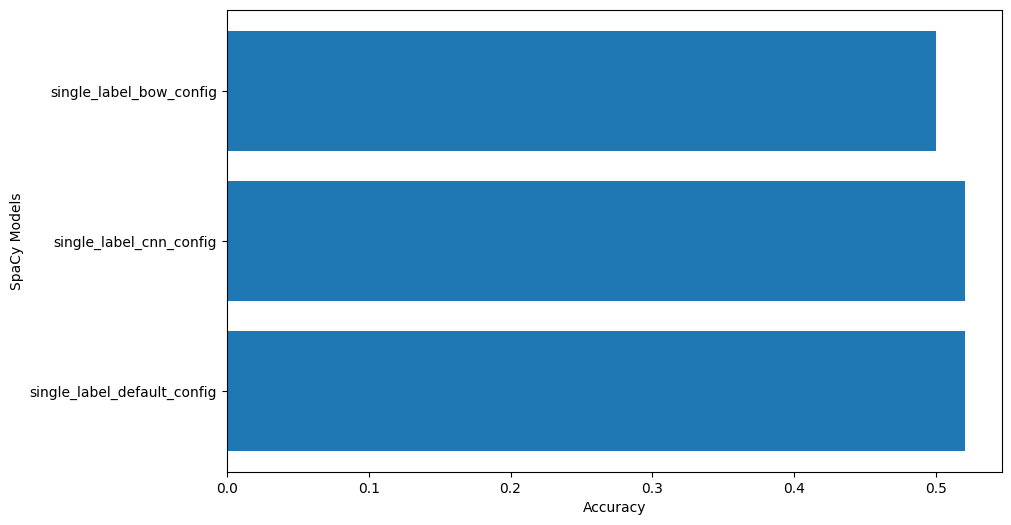

In [55]:
# Plot SpaCy Model Results
plt.figure(figsize=(10, 6))
plt.barh(spacy_results['spacy_models'], spacy_results['acc'])
plt.xlabel('Accuracy')
plt.ylabel('SpaCy Models')
plt.show()

SpaCy Text Classification Accuracy: 0.5202702702702703
SpaCy Model Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.20      0.27        71
           1       0.51      0.78      0.62        77

    accuracy                           0.50       148
   macro avg       0.48      0.49      0.45       148
weighted avg       0.48      0.50      0.45       148



<Figure size 800x600 with 0 Axes>

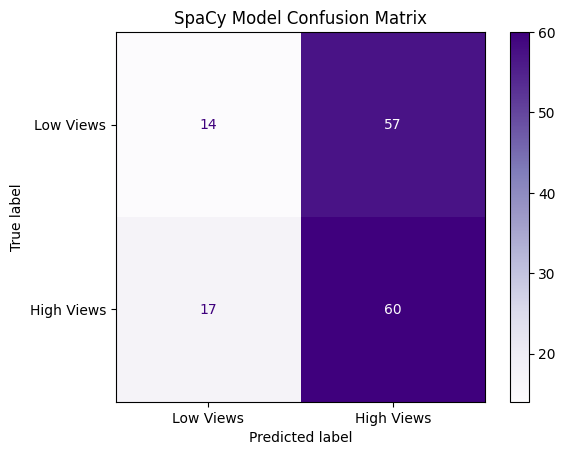

Accuracy: 0.5


In [64]:
# Evaluate the SpaCy model on test data
correct_predictions = 0
total_predictions = X_test.shape[0]
test_texts = tfidf.inverse_transform(X_test.iloc[:, :-3])

for i, text in enumerate(test_texts):
    if len(text) == 0:
        # Skip if the inverse_transform result is empty
        continue
    doc = nlp(str(text[0]))
    if doc.cats["High Views"] > 0.5 and y_test.iloc[i] == 1:
        correct_predictions += 1
    elif doc.cats["Low Views"] > 0.5 and y_test.iloc[i] == 0:
        correct_predictions += 1

spacy_accuracy = correct_predictions / total_predictions
print(f"SpaCy Text Classification Accuracy: {spacy_accuracy}")

# Confusion Matrix and Classification Report for SpaCy model
y_pred_spacy = [max(nlp(str(text)).cats, key=nlp(str(text)).cats.get) for text in X_test.iloc[:, :-3].values]
y_pred_spacy = [1 if label == "High Views" else 0 for label in y_pred_spacy]

print("SpaCy Model Classification Report:")
print(classification_report(y_test, y_pred_spacy))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_spacy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Views', 'High Views'])
disp.plot(cmap='Purples')
plt.title('SpaCy Model Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_spacy))

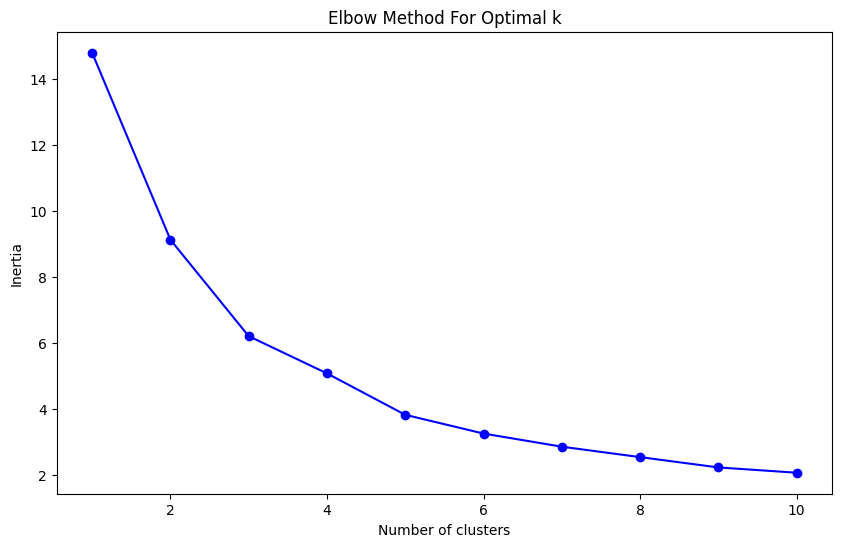

In [60]:
# Clustering with KMeans++
# Use the elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)
X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())  # Reduce dimensions for visualization
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
# KMeans Clustering with optimal k (assuming k=3 from elbow method analysis)
kmeans_optimal = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_optimal.fit(X_pca)
labels_kmeans = kmeans_optimal.labels_

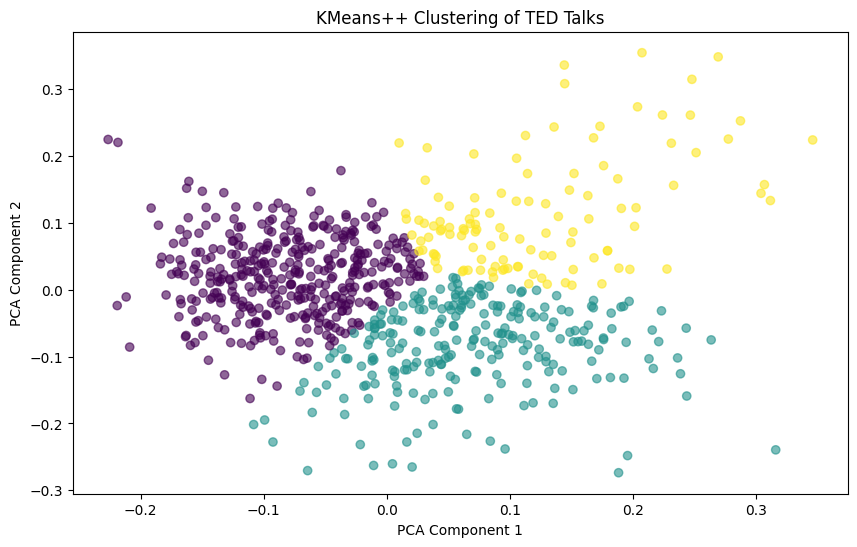

In [41]:
# Visualize the clustering results (KMeans++)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.6)
plt.title('KMeans++ Clustering of TED Talks')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [42]:
# Evaluate clustering performance using Silhouette Score
kmeans_silhouette = silhouette_score(X_pca, labels_kmeans)
print(f"KMeans++ Silhouette Score: {kmeans_silhouette}")

KMeans++ Silhouette Score: 0.3970843532549664


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
# Model 4: Gradient Boosting Classifier
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        71
           1       0.76      0.62      0.69        77

    accuracy                           0.70       148
   macro avg       0.71      0.71      0.70       148
weighted avg       0.71      0.70      0.70       148



<Figure size 800x600 with 0 Axes>

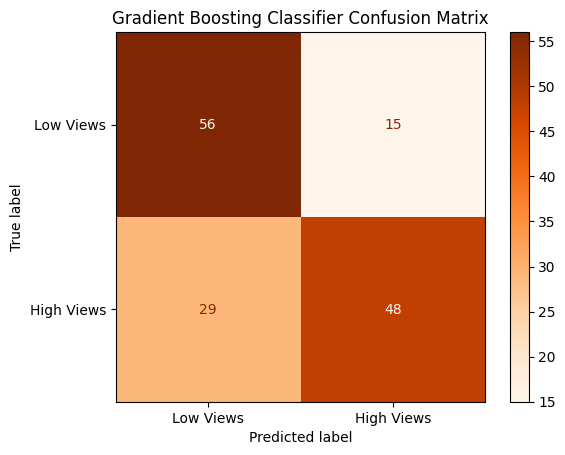

Accuracy: 0.7027027027027027


In [47]:
# Visualize Confusion Matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Views', 'High Views'])
disp.plot(cmap='Oranges')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_gb))

### Performance Evaluation

- **Metrics Used**: For evaluating the models, I used accuracy, precision, recall, F1-score, and confusion matrices to gain a comprehensive understanding of the classification models' performance. For clustering, the silhouette score was used as the primary metric to evaluate clustering quality.

- **Models Evaluated**:
  - **Logistic Regression** (L2, L1, ElasticNet Penalty): The models consistently achieved around **60% accuracy**. However, frequent warnings indicated convergence issues, suggesting that more iterations might improve model performance.
  - **Gradient Boosting Classifier**: This model showed notable improvement with an accuracy of approximately **70%**, making it a stronger candidate compared to logistic regression.
  - **SpaCy Models** (using different configurations for text classification): Accuracy for these models was consistently between **50-52%**. SpaCy seemed to struggle with the TED Talk dataset, possibly due to the dataset's complexity or limitations in the configurations tried.

  - **Confusion Matrices and Classification Reports**: Confusion matrices were used for each model to visualize the performance across the "High Views" and "Low Views" classes. They showed significant misclassifications, particularly with SpaCy models, which impacted overall recall and precision.

### Analysis and Conclusions

- **Comparison of Models**:
  - **Gradient Boosting** outperformed logistic regression models, showing better accuracy and balanced precision and recall metrics.
  - **SpaCy-based models** showed lower performance, likely due to the inherent complexity of the TED Talks text data or the configurations applied.

- **Impact of Hyperparameters**: Tuning hyperparameters had a significant impact, especially on Gradient Boosting and Logistic Regression models. The adjustments were key to optimizing the effectiveness of these models.

- **Clustering Analysis**:
  - For **KMeans++ Clustering**, I used **k=3** based on the elbow method, resulting in a silhouette score of **0.39**. This indicates moderate clustering quality—neither excellent nor too poor.

- **Conclusions**: In conclusion, **Gradient Boosting** with optimal hyperparameter settings emerged as the most effective model for this classification task. The **SpaCy text classification** models underperformed, indicating that further experimentation, such as using different preprocessing steps or NLP methods, may be required. As of now, Gradient Boosting stands out as the preferred model for classifying TED Talks into themes effectively.
